In [32]:
# load necessary packages
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from PIL import Image
from io import BytesIO


# Read the CSV file into a DataFrame
df = pd.read_excel("https://github.com/jewelercart/Storm-Analysis/blob/main/Storm.xlsx")

# Fill NaN values with 0
df.fillna(0, inplace=True)


In [33]:
# Calculate the average 'Big' value for each year
df['Big'] = df.groupby('yr')['Big'].transform('mean')

# Print the updated DataFrame
print(df.head())


     yr  mo  dy        date  st       mag       inj       fat      slat  \
0  1950   1   3  03/01/1950  IL  1.798950  0.085530 -0.060960  0.384294   
1  1950   1   3  03/01/1950  MO  1.798950  0.085530 -0.060960  0.319512   
2  1950   1   3  03/01/1950  OH  0.240559 -0.023975 -0.060960  0.733727   
3  1950   1  13  13/01/1950  AR  1.798950 -0.023975  0.612847 -0.538363   
4  1950   1  25  25/01/1950  IL  1.019754 -0.078727 -0.060960  0.790657   

       slon   elat   elon  len  wid  Number  Temp  Maximum_wind_speed  \
0  0.401033  39.12 -89.23  3.6  130      21  51.6                  75   
1  0.295153  38.83 -90.03  9.5  150      21  51.6                  75   
2  0.944242   0.00   0.00  0.1   10      21  51.6                  75   
3 -0.182456   0.00   0.00  0.6   17      21  51.6                  75   
4  0.627754   0.00   0.00  0.1  100      21  51.6                  75   

        Big  
0  0.984111  
1  0.984111  
2  0.984111  
3  0.984111  
4  0.984111  


In [34]:
# Define function to categorize hurricanes
def categorize_hurricane(wind_speed):
    if wind_speed >= 157:
        return 'Category 5'
    elif wind_speed >= 130:
        return 'Category 4'
    elif wind_speed >= 111:
        return 'Category 3'
    elif wind_speed >= 96:
        return 'Category 2'
    elif wind_speed >= 74:
        return 'Category 1'
    else:
        return 'Not categorized'



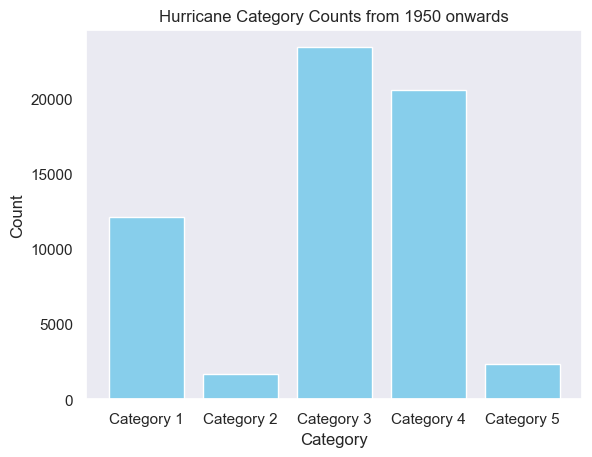

In [35]:
# Apply categorization to the DataFrame
df['Category'] = df['Maximum_wind_speed'].apply(categorize_hurricane)

# Filter data from 1950 onwards
df = df[df['yr'] >= 1950]

# Count occurrences of each category
category_counts = df['Category'].value_counts().sort_index()

# Plotting
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Hurricane Category Counts from 1950 onwards')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the columns using Min-Max Scaling
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['Big', 'Temp', 'Number']] = scaler.fit_transform(df[['Big', 'Temp', 'Number']])


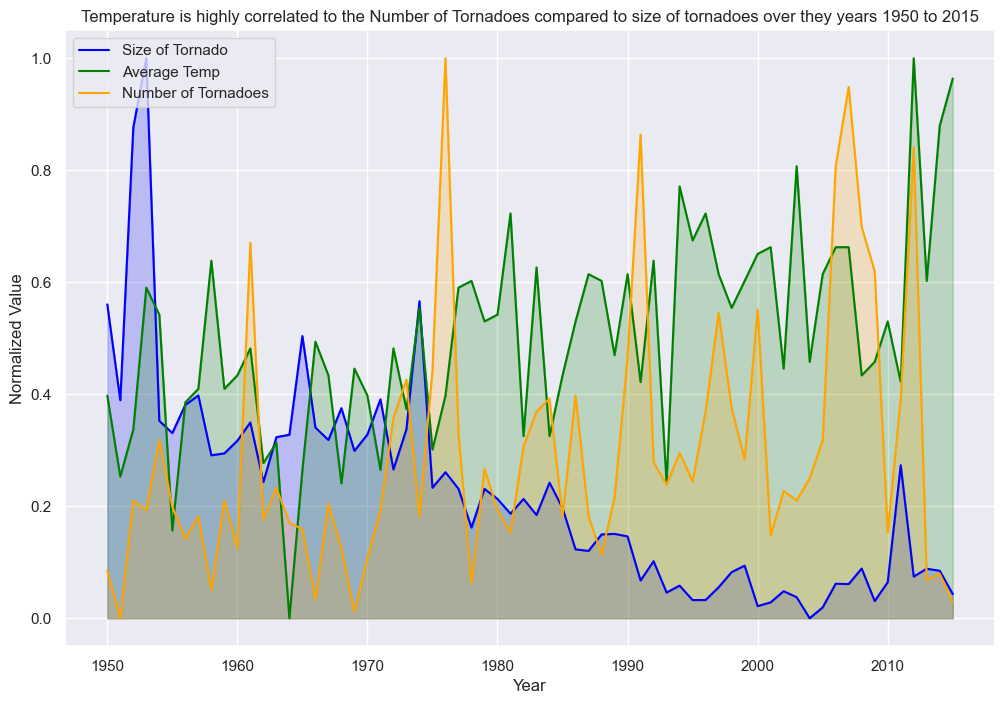

In [37]:
# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_normalized, x='yr', y='Big', label='Size of Tornado', color='blue')
sns.lineplot(data=df_normalized, x='yr', y='Temp', label='Average Temp', color='green')
sns.lineplot(data=df_normalized, x='yr', y='Number', label='Number of Tornadoes', color='orange')
plt.fill_between(df_normalized['yr'], df_normalized['Big'], color='blue', alpha=0.2)
plt.fill_between(df_normalized['yr'], df_normalized['Temp'], color='green', alpha=0.2)
plt.fill_between(df_normalized['yr'], df_normalized['Number'], color='orange', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Temperature is highly correlated to the Number of Tornadoes compared to size of tornadoes over they years 1950 to 2015')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
# Calculate correlation between temperature and tornado frequency
temp_freq_corr, _ = pearsonr(df['Temp'], df['Number'])
print(f"Correlation between temperature and tornado frequency: {temp_freq_corr:.2f}")

# Calculate correlation between temperature and tornado magnitude
temp_mag_corr, _ = pearsonr(df['Temp'], df['mag'])
print(f"Correlation between temperature and tornado magnitude: {temp_mag_corr:.2f}")

Correlation between temperature and tornado frequency: 0.06
Correlation between temperature and tornado magnitude: -0.18


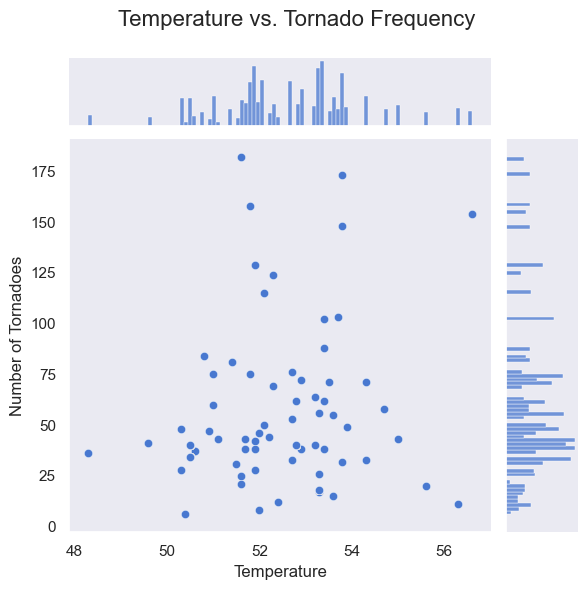

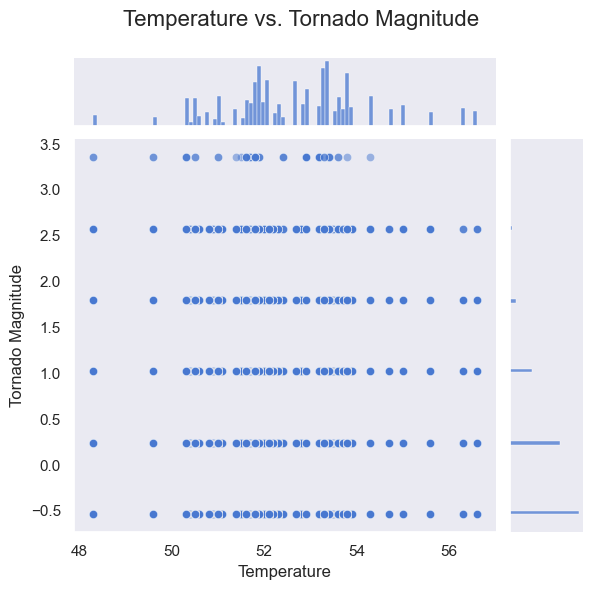

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up seaborn style
sns.set(style="dark", palette="muted", color_codes=True)

# Create jointplot for Temperature vs. Tornado Frequency
sns.jointplot(x='Temp', y='Number', data=df, kind='scatter', alpha=0.5, height=6)
plt.subplots_adjust(top=0.9)
plt.suptitle('Temperature vs. Tornado Frequency', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Number of Tornadoes', fontsize=12)

# Create jointplot for Temperature vs. Tornado Magnitude
sns.jointplot(x='Temp', y='mag', data=df, kind='scatter', alpha=0.5, height=6)
plt.subplots_adjust(top=0.9)
plt.suptitle('Temperature vs. Tornado Magnitude', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Tornado Magnitude', fontsize=12)

plt.show()


In [40]:
import statsmodels.api as sm

# Linear regression: temperature vs. tornado frequency
X = sm.add_constant(df['Temp'])
y = df['Number']
model = sm.OLS(y, X).fit()
print(model.summary())

# Linear regression: temperature vs. tornado magnitude
X = sm.add_constant(df['Temp'])
y = df['mag']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Number   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     243.9
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           6.99e-55
Time:                        21:10:04   Log-Likelihood:            -3.0785e+05
No. Observations:               60115   AIC:                         6.157e+05
Df Residuals:                   60113   BIC:                         6.157e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.4820      5.845     -4.702      0.0

In [30]:
# Linear regression: temperature vs. tornado frequency
X = sm.add_constant(df['Temp'])
y = df['Number']
model = sm.OLS(y, X).fit()
summary_text = model.summary().as_text()

# Convert text summary to HTML
summary_html = '<html><body>' + summary_text + '</body></html>'

# Create a figure to plot the HTML table
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.table(cellText=[[summary_html]], loc='center')

# Save the figure as an image
plt.savefig('model_summary_frequency.png', bbox_inches='tight', dpi=300)
plt.close()


# Linear regression: temperature vs. tornado magnitude
X = sm.add_constant(df['Temp'])
y = df['mag']
model = sm.OLS(y, X).fit()
summary_text = model.summary().as_text()

# Convert text summary to HTML
summary_html = '<html><body>' + summary_text + '</body></html>'

# Create a figure to plot the HTML table
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.table(cellText=[[summary_html]], loc='center')

# Save the figure as an image
plt.savefig('model_summary_magnitude.png', bbox_inches='tight', dpi=300)
plt.close()


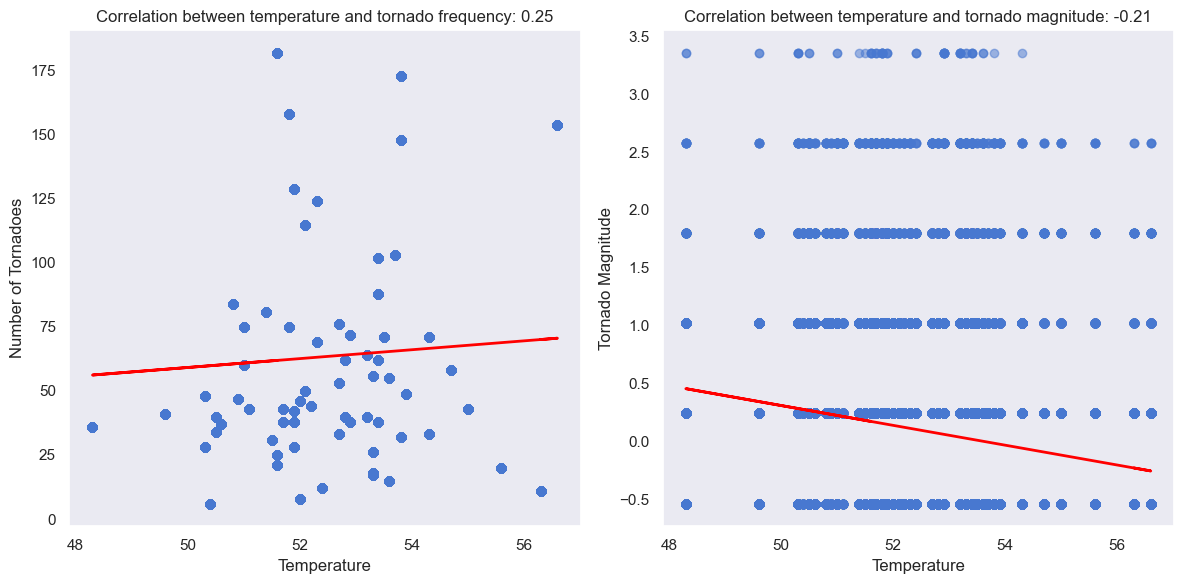

In [9]:
# Linear regression: temperature vs. tornado frequency
X1 = sm.add_constant(df['Temp'])
y1 = df['Number']
model1 = sm.OLS(y1, X1).fit()

# Linear regression: temperature vs. tornado magnitude
X2 = sm.add_constant(df['Temp'])
y2 = df['mag']
model2 = sm.OLS(y2, X2).fit()

# Scatter plots
plt.figure(figsize=(12, 6))

# Temperature vs. Tornado Frequency
plt.subplot(1, 2, 1)
plt.scatter(df['Temp'], df['Number'], alpha=0.5)
plt.plot(df['Temp'], model1.predict(), color='red', linewidth=2)
plt.title('Correlation between temperature and tornado frequency: 0.25')
plt.xlabel('Temperature')
plt.ylabel('Number of Tornadoes')

# Temperature vs. Tornado Magnitude
plt.subplot(1, 2, 2)
plt.scatter(df['Temp'], df['mag'], alpha=0.5)
plt.plot(df['Temp'], model2.predict(), color='red', linewidth=2)
plt.title('Correlation between temperature and tornado magnitude: -0.21')
plt.xlabel('Temperature')
plt.ylabel('Tornado Magnitude')

plt.tight_layout()
plt.show()
